# Value Iteration

In [1]:
from copy import deepcopy

import numpy as np

In [2]:
class ValueIterationGridGame:

    def __init__(self, num_of_rows=5, num_of_cols=5, seed=1351):
        self.actions = [('right', (+0, +1), '➡'),
                        ('left ', (+0, -1), '⬅'),
                        (' up  ', (-1, +0), '⬆'),
                        ('down ', (+1, +0), '⬇')]
        self.seed = seed
        self.num_of_rows = num_of_rows
        self.num_of_cols = num_of_cols

        self.total_num_of_states = self.num_of_rows * self.num_of_cols
        self.terminal_states = [0, self.num_of_rows * self.num_of_cols - 1]
        self.possible_states = []
        for each in range(self.terminal_states[1] + 1):
            self.possible_states.append(each)

        np.random.seed(self.seed)
        self.rewards = np.zeros((self.total_num_of_states, self.total_num_of_states))
        self.Q = np.zeros((self.total_num_of_states, self.total_num_of_states))
        # self.Q = np.random.random((self.total_number_of_states, self.total_number_of_states))
        self.current_state = None
        self.init_rewards()

    def init_game(self, state):
        self.current_state = state

    def cords_to_state(self, x, y):
        return x * self.num_of_rows + y

    def valid_state(self, idx):
        return -1 < idx < self.total_num_of_states

    def valid_cords(self, x, y):
        return -1 < x < self.num_of_rows and -1 < y < self.num_of_cols

    def init_rewards(self):
        for terminal_state in self.terminal_states:
            self.rewards[terminal_state, terminal_state] = 25
        for x in range(self.num_of_rows):
            for y in range(self.num_of_cols):
                curr_state = self.cords_to_state(x, y)
                for action in self.actions:
                    dx, dy = action[1]
                    nx, ny = (x + dx, y + dy)
                    next_state = self.cords_to_state(nx, ny)
                    if self.valid_cords(nx, ny) and self.valid_state(next_state):
                        self.rewards[curr_state, next_state] = -5
        pass

    def unravel_state_to_cords(self, state):
        return np.unravel_index(state, (self.num_of_rows, self.num_of_cols))

    def find_neighbours(self, x, y):
        return [self.cords_to_state(x + dx, y + dy) for action, (dx, dy), arrow in self.actions]

    def print_Q_table_row(self, state):
        x, y = np.unravel_index(state, (self.num_of_rows, self.num_of_cols))
        print(f"{f'({x}, {y})':^10}: ", end='\t')
        neighbours_state = self.find_neighbours(x, y)
        for next_state, action in zip(neighbours_state, self.actions):
            if next_state in self.possible_states:
                print(f"{self.Q[state, next_state]:^10.3f}", end='\t')
            else:
                print(f"{0.0:^10.3f}", end='\t')
        print()

    def train_iteration_algorithm(self, alpha=0.2, gamma=0.9, iterations=20000):
        self.Q = deepcopy(self.rewards)
        for train_iter in range(iterations):
            curr_state = np.random.choice(self.possible_states)
            next_states_allowed = list()
            for each_state in range(len(self.possible_states)):
                if self.rewards[curr_state][each_state]:
                    next_states_allowed.append(each_state)
            next_state = np.random.choice(next_states_allowed)
            curr_reward = self.rewards[curr_state][next_state]
            max_Q = max(self.Q[next_state])
            self.Q[curr_state][next_state] = (1 - alpha) * self.Q[curr_state][next_state] + alpha * (
                    curr_reward + gamma * max_Q)

    def draw_board(self):
        grid_list = np.array(['()' for _ in range(self.num_of_rows * self.num_of_cols)])
        grid = grid_list.reshape(self.num_of_rows, self.num_of_cols)
        print(self.current_state)
        for ts in self.terminal_states:
            grid[self.unravel_state_to_cords(ts)] = '🙂'
        grid[self.unravel_state_to_cords(self.current_state)] = '😎'
        print(grid)

    def play_game(self, start_index):
        curr_state = self.cords_to_state(start_index[0], start_index[1])
        self.init_game(curr_state)
        self.draw_board()
        steps = 0
        if self.current_state in self.terminal_states:
            print("Terminal state")
        else:
            while True:
                steps = steps + 1
                next_state = np.argmax(self.Q[self.current_state])
                self.current_state = next_state
                self.draw_board()
                if self.current_state in self.terminal_states:
                    break
        print(f"Total steps: {steps}")

In [3]:
def print_Q_table(_grid_world):
    print(f'{f"State/Action":^12}', end='\t')
    for action in _grid_world.actions:
        print(f'{action[2]:^10}', end='\t')
    print()
    for x in range(_grid_world.num_of_rows):
        for y in range(_grid_world.num_of_cols):
            _grid_world.print_Q_table_row(_grid_world.cords_to_state(x, y))

In [4]:
grid_world = ValueIterationGridGame()
print("Initial Q table")
print_Q_table(grid_world)

Initial Q table
State/Action	    ➡     	    ⬅     	    ⬆     	    ⬇     	
  (0, 0)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (0, 1)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (0, 2)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (0, 3)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (0, 4)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (1, 0)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (1, 1)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (1, 2)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (1, 3)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (1, 4)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (2, 0)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (2, 1)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (2, 2)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (2, 3)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (2, 4)  : 	  0.000   	  0.000   	  0.000   	  0.000   	
  (3, 0)  : 	  0.000   	  0.000   	  0.000   	  0.000   

In [5]:
grid_world.train_iteration_algorithm()
print("Terminal States for our game - ", grid_world.terminal_states)
print("All Possible States for our game - ", grid_world.possible_states)

Terminal States for our game -  [0, 24]
All Possible States for our game -  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [6]:
# for row in range(5):
#     for col in range(5):
#         grid_world.play_game([row, col])

In [7]:
print("Final Q table")
print_Q_table(grid_world)

Final Q table
State/Action	    ➡     	    ⬅     	    ⬆     	    ⬇     	
  (0, 0)  : 	 192.195  	  0.000   	  0.000   	 192.147  	
  (0, 1)  : 	 167.854  	 219.185  	  0.000   	 167.846  	
  (0, 2)  : 	 145.970  	 192.218  	  0.000   	 145.988  	
  (0, 3)  : 	 126.327  	 167.899  	  0.000   	 126.271  	
  (0, 4)  : 	  0.000   	 146.044  	  0.000   	 145.276  	
  (1, 0)  : 	 167.840  	  0.000   	 219.194  	 167.927  	
  (1, 1)  : 	 145.869  	 192.174  	 192.157  	 145.915  	
  (1, 2)  : 	 126.257  	 167.849  	 167.796  	 126.256  	
  (1, 3)  : 	 145.145  	 145.878  	 145.991  	 145.113  	
  (1, 4)  : 	  0.000   	 126.264  	 126.367  	 167.104  	
  (2, 0)  : 	 145.965  	  0.000   	 192.234  	 146.049  	
  (2, 1)  : 	 126.288  	 167.839  	 167.803  	 126.228  	
  (2, 2)  : 	 145.095  	 145.923  	 145.984  	 145.006  	
  (2, 3)  : 	 166.908  	 126.239  	 126.297  	 166.963  	
  (2, 4)  : 	  0.000   	 145.117  	 145.100  	 191.348  	
  (3, 0)  : 	 126.328  	  0.000   	 167.915  	 126.370  	


# Deep Q-Learning

In [8]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.optim import Adam

from collections import deque

In [9]:
class DeepQLearningNeuralNet(nn.Module):
    def __init__(self, in_size, out_size=4):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_size, 32),  # Hidden Layer1
            nn.ReLU(),
            nn.Linear(32, 8),  # Hidden Layer2
            nn.ReLU(),
            nn.Linear(8, 16),  # Hidden Layer3
            nn.ReLU(),
            nn.Linear(16, out_size)
        )

    def forward(self, x):
        return self.layers(x)

In [10]:
class DeepQLearningGridGame:
    def __init__(self, num_of_rows=5, num_of_cols=5, seed=1351, mem_size=5000):
        self.actions = [('right', (+0, +1), '➡'),
                        ('left ', (+0, -1), '⬅'),
                        (' up  ', (-1, +0), '⬆'),
                        ('down ', (+1, +0), '⬇')]
        self.action_dict = {0: 'right', 1: 'left', 2: 'up', 3: 'down'}
        self.seed = seed
        self.num_of_rows = num_of_rows
        self.num_of_cols = num_of_cols

        self.replay = deque(maxlen=mem_size)

        self.total_num_of_states = self.num_of_rows * self.num_of_cols
        self.terminal_states = [0, self.num_of_rows * self.num_of_cols - 1]
        self.possible_states = []
        for each in range(self.terminal_states[1] + 1):
            self.possible_states.append(each)

        np.random.seed(self.seed)
        self.rewards = np.zeros((self.total_num_of_states, self.total_num_of_states))
        self.Q = np.zeros((self.total_num_of_states, self.total_num_of_states))
        # self.Q = np.random.random((self.total_number_of_states, self.total_number_of_states))
        self.current_state = None
        self.model = None
        self.size_of_dnn_input = 75
        self.components = {'P1': self.current_state,
                           'G1': self.terminal_states[0],
                           'G2': self.terminal_states[1]}
        self.init_rewards()
        num_item = len(self.components)
        ip_dnn = num_item * self.num_of_rows * self.num_of_cols
        self.model = DeepQLearningNeuralNet(ip_dnn)
        self.init_game_random()

    def init_game_random(self):
        self.current_state = np.random.choice(self.possible_states)

    def init_game(self, state):
        self.current_state = state

    def print_model_param(self):
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                print(name, param.data)

    def cords_to_state(self, x, y):
        return x * self.num_of_rows + y

    def valid_state(self, state_id):
        return 0 <= state_id < self.total_num_of_states

    def valid_cords(self, x, y):
        return 0 <= x < self.num_of_rows and 0 <= y < self.num_of_cols

    def check_action(self, index):
        maybe_next_state = self.current_state + self.perform_action(self.action_dict[index])
        if self.valid_state(maybe_next_state):
            temp_reward = self.rewards[self.current_state][maybe_next_state]
            if temp_reward:
                return True
        return False

    def update_components(self):
        self.components = {'P1': self.current_state,
                           'G1': self.terminal_states[0],
                           'G2': self.terminal_states[1]}

    def init_rewards(self):
        for terminal_state in self.terminal_states:
            self.rewards[terminal_state, terminal_state] = 125
        for x in range(self.num_of_rows):
            for y in range(self.num_of_cols):
                curr_state = self.cords_to_state(x, y)
                for action in self.actions:
                    dx, dy = action[1]
                    nx, ny = (x + dx, y + dy)
                    next_state = self.cords_to_state(nx, ny)
                    if self.valid_cords(nx, ny) and self.valid_state(next_state):
                        self.rewards[curr_state, next_state] = -1

    def get_input_for_DNN(self):
        self.update_components()
        num_item = len(self.components)
        num_terms = num_item * self.num_of_rows * self.num_of_cols
        ip_dnn = np.zeros((num_item, self.num_of_rows, self.num_of_cols), dtype=np.uint8)
        self.size_of_dnn_input = (num_item, self.num_of_rows, self.num_of_cols)
        comp = 0
        for name in self.components:
            item_pos = np.unravel_index(self.components[name], (self.num_of_rows, self.num_of_cols))
            pos = (comp,) + item_pos
            ip_dnn[pos] = 1
            comp += 1
        return torch.FloatTensor(ip_dnn.reshape(1, num_terms))

    def perform_action(self, action):
        if action == 'up':
            return -self.num_of_cols
        elif action == 'down':
            return +self.num_of_cols
        elif action == 'left':
            return -1
        elif action == 'right':
            return +1
        else:
            raise BaseException("Action not possible")

    def unravel_state_to_cords(self, state):
        return np.unravel_index(state, (self.num_of_rows, self.num_of_cols))

    def draw_board(self):
        grid_list = np.array(['()' for _ in range(self.num_of_rows * self.num_of_cols)])
        grid = grid_list.reshape(self.num_of_rows, self.num_of_cols)
        print(self.current_state)
        for ts in self.terminal_states:
            grid[self.unravel_state_to_cords(ts)] = '🙂'
        grid[self.unravel_state_to_cords(self.current_state)] = '😎'
        print(grid)

    def get_reward(self, next_state):
        return self.rewards[self.current_state][next_state]

    def print_Q_table_row(self, curr_state):
        x, y = np.unravel_index(curr_state, (self.num_of_rows, self.num_of_cols))
        print(f"{f'({x}, {y})':^10}: ", end='\t')
        self.init_game(curr_state)

        input_to_model = self.get_input_for_DNN()
        q_values = self.model(input_to_model).detach().numpy().reshape((4,))
        for q_value in q_values:
            print(f"{q_value:^10.3f}", end='\t')
        print()

    def train(self, alpha=1e-3, gamma=0.9, iterations=1000, max_steps_per_episode=1000):
        mem_size = 5000
        replay = deque(maxlen=mem_size)
        count_actions = {'up': 0, 'down': 0, 'left': 0, 'right': 0}
        loss_function = nn.MSELoss()
        optimization_algorithm = Adam(self.model.parameters(), lr=alpha)
        losses = []
        reward_per_episode = []
        eps = 1
        for each_iter in range(iterations):
            cumulative_reward = 0
            epsilon = 0.9 ** (each_iter + 1)
            if each_iter % 100 == 100:
                print("Iteration", each_iter)
            count = 0
            self.init_game_random()
            done = True
            if eps > 0.1:
                eps -= (1 / iterations)
            while done:
                if count == max_steps_per_episode:
                    break
                self.update_components()
                count += 1
                X_train = self.get_input_for_DNN()
                X_train += torch.FloatTensor(np.random.rand(1, 75) / 10.0)
                q_values = self.model(X_train)
                qvalues = q_values.detach().numpy().reshape((4,))
                random_num = random.random()
                if random_num > eps:
                    max_q = - math.inf
                    next_action_index = math.inf
                    action = "nothing"
                    for index, value in enumerate(qvalues):
                        maybe_next_state = self.current_state + self.perform_action(self.action_dict[index])
                        if self.valid_state(maybe_next_state):
                            temp_reward = self.rewards[self.current_state][maybe_next_state]
                            if temp_reward:
                                if value > max_q:
                                    next_action_index = index
                                    action = self.action_dict[index]
                                    max_q = value
                else:
                    while True:
                        next_action_index = random.randint(0, 3)
                        maybe_next_state = self.current_state + self.perform_action(self.action_dict[next_action_index])
                        if self.valid_state(maybe_next_state):
                            temp_reward = self.rewards[self.current_state][maybe_next_state]
                            if temp_reward:
                                if self.check_action(next_action_index):
                                    action = self.action_dict[next_action_index]
                                    break
                next_state = self.current_state + self.perform_action(action)
                this_reward = self.get_reward(next_state)
                next_action_string = self.action_dict[next_action_index]
                count_actions[next_action_string] += 1
                self.current_state = next_state
                if next_state in self.terminal_states:
                    y_train_update = this_reward
                    done = False
                else:
                    input_val = self.get_input_for_DNN()
                    input_val += torch.FloatTensor(np.random.rand(1, 75) / 10.0)
                    qvalues_next_state = self.model(input_val).detach().numpy().reshape((4,))
                    max_q_next_state = - math.inf
                    for index, value in enumerate(qvalues_next_state):
                        maybe_next_to_next_state = next_state + self.perform_action(self.action_dict[index])
                        if self.valid_state(maybe_next_to_next_state):
                            if self.rewards[next_state][maybe_next_to_next_state]:
                                if value > max_q_next_state:
                                    max_q_next_state = value
                    y_train_update = this_reward + gamma * max_q_next_state
                Y = torch.Tensor([y_train_update]).detach()
                X = q_values.squeeze()[next_action_index]
                cumulative_reward += this_reward

                optimization_algorithm.zero_grad()
                loss = loss_function(X, Y)
                loss.backward()
                losses.append(loss.item())
                optimization_algorithm.step()
                reward_per_episode.append(cumulative_reward)
        # print("The actions we took to train the model", count_actions)
        return reward_per_episode, losses, self.model

    def play_game(self, start_index):
        this_state = self.cords_to_state(start_index[0], start_index[1])
        self.init_game(this_state)
        self.update_components()
        self.draw_board()
        eps = 0
        steps = 0
        if self.current_state in self.terminal_states:
            print("Terminal state")
            print(f"Total steps: {steps}")
            return
        while True:
            steps = steps + 1
            X_test = self.get_input_for_DNN()
            X_test += torch.FloatTensor(np.random.rand(1, 75) / 10.0)
            q_values = self.model(X_test).detach().numpy().reshape((4,))
            qvalues = q_values
            random_num = random.random()
            if random_num > eps:
                max_q = - math.inf
                next_action_index = math.inf
                action = "nothing"
                for index, value in enumerate(qvalues):
                    maybe_next_state = self.current_state + self.perform_action(self.action_dict[index])
                    if self.valid_state(maybe_next_state):
                        temp_reward = self.rewards[self.current_state][maybe_next_state]
                        if temp_reward:
                            if value > max_q:
                                next_action_index = index
                                action = self.action_dict[index]
                                max_q = value
            else:
                while True:
                    next_action_index = random.randint(0, 3)
                    maybe_next_state = self.current_state + self.perform_action(self.action_dict[next_action_index])
                    if self.valid_state(maybe_next_state):
                        temp_reward = self.rewards[self.current_state][maybe_next_state]
                        if temp_reward:
                            if self.check_action(next_action_index):
                                action = self.action_dict[next_action_index]
                                break
            next_state = self.current_state + self.perform_action(action)
            next_action_string = self.actions[next_action_index][2]
            print("{}: from {} to {} ".format(
                next_action_string,
                np.unravel_index(self.current_state, (self.num_of_rows, self.num_of_cols)),
                np.unravel_index(next_state, (self.num_of_rows, self.num_of_cols)), 
                ))
            self.current_state = next_state
            self.draw_board()
            if self.current_state in self.terminal_states:
                break
        print(f"Total steps: {steps}")

In [11]:
def print_Q_table(_grid_world):
    print(f'{f"State/Action":^12}', end='\t')
    for action in _grid_world.actions:
        print(f'{action[2]:^10}', end='\t')
    print()
    for x in range(_grid_world.num_of_rows):
        for y in range(_grid_world.num_of_cols):
            _grid_world.print_Q_table_row(_grid_world.cords_to_state(x, y))


def plot_rewards_losses(reward_per_episode, losses):
    plot1 = plt.figure(1)
    plt.plot(reward_per_episode)
    plt.xlabel("Epochs", fontsize=18)
    plt.ylabel("Reward", fontsize=18)
    plot1.show()

    plot2 = plt.figure(2)
    plt.plot(losses)
    plt.xlabel("Epochs", fontsize=18)
    plt.ylabel("Loss", fontsize=18)
    plot2.show()

In [12]:
deep_grid_game = DeepQLearningGridGame()
print("Terminal States for our game - ", deep_grid_game.terminal_states)
print("All Possible States for our game - ", deep_grid_game.possible_states)

Terminal States for our game -  [0, 24]
All Possible States for our game -  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [13]:
print("Initial Q table")
print_Q_table(deep_grid_game)

Initial Q table
State/Action	    ➡     	    ⬅     	    ⬆     	    ⬇     	
  (0, 0)  : 	  0.125   	  -0.044  	  0.198   	  0.275   	
  (0, 1)  : 	  0.121   	  -0.036  	  0.202   	  0.275   	
  (0, 2)  : 	  0.131   	  -0.045  	  0.189   	  0.268   	
  (0, 3)  : 	  0.126   	  -0.042  	  0.193   	  0.273   	
  (0, 4)  : 	  0.122   	  -0.036  	  0.201   	  0.273   	
  (1, 0)  : 	  0.130   	  -0.050  	  0.189   	  0.273   	
  (1, 1)  : 	  0.120   	  -0.034  	  0.203   	  0.274   	
  (1, 2)  : 	  0.125   	  -0.036  	  0.202   	  0.269   	
  (1, 3)  : 	  0.120   	  -0.034  	  0.202   	  0.275   	
  (1, 4)  : 	  0.120   	  -0.035  	  0.201   	  0.275   	
  (2, 0)  : 	  0.126   	  -0.041  	  0.198   	  0.271   	
  (2, 1)  : 	  0.118   	  -0.034  	  0.204   	  0.278   	
  (2, 2)  : 	  0.124   	  -0.039  	  0.197   	  0.273   	
  (2, 3)  : 	  0.126   	  -0.047  	  0.196   	  0.276   	
  (2, 4)  : 	  0.127   	  -0.045  	  0.193   	  0.273   	
  (3, 0)  : 	  0.122   	  -0.037  	  0.199   	  0.275   

In [14]:
reward_per_episode, losses, model = deep_grid_game.train()
# plot_rewards_losses(reward_per_episode, losses)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [15]:
for x in range(5):
    for y in range(5):
        deep_grid_game.play_game([x, y])

0
[['😎' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
Terminal state
Total steps: 0
1
[['🙂' '😎' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
➡: from (0, 1) to (0, 2) 
2
[['🙂' '()' '😎' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
➡: from (0, 2) to (0, 3) 
3
[['🙂' '()' '()' '😎' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
➡: from (0, 3) to (0, 4) 
4
[['🙂' '()' '()' '()' '😎']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
⬇: from (0, 4) to (1, 4) 
9
[['🙂' '()' '()' '()' '()']
 ['()' '()' '()' '()' '😎']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
⬇: from (1, 4) to (2, 4) 

In [16]:
print("Final Q table")
print_Q_table(deep_grid_game)

Final Q table
State/Action	    ➡     	    ⬅     	    ⬆     	    ⬇     	
  (0, 0)  : 	  -2.306  	  -3.498  	  -3.279  	  -2.376  	
  (0, 1)  : 	  -2.474  	  -3.605  	  -3.407  	  -2.539  	
  (0, 2)  : 	  -3.646  	  -4.939  	  -4.687  	  -3.778  	
  (0, 3)  : 	  -3.124  	  -4.419  	  -4.173  	  -3.247  	
  (0, 4)  : 	  -2.385  	  -3.605  	  -3.380  	  -2.467  	
  (1, 0)  : 	  -1.958  	  -3.057  	  -2.869  	  -2.002  	
  (1, 1)  : 	  -3.397  	  -4.652  	  -4.415  	  -3.516  	
  (1, 2)  : 	  -3.156  	  -4.452  	  -4.209  	  -3.286  	
  (1, 3)  : 	  -2.515  	  -3.753  	  -3.526  	  -2.608  	
  (1, 4)  : 	  -1.662  	  -2.851  	  -2.641  	  -1.719  	
  (2, 0)  : 	  -3.526  	  -4.820  	  -4.570  	  -3.657  	
  (2, 1)  : 	  -3.136  	  -4.400  	  -4.162  	  -3.251  	
  (2, 2)  : 	  -2.416  	  -3.640  	  -3.410  	  -2.494  	
  (2, 3)  : 	  -1.695  	  -2.885  	  -2.678  	  -1.759  	
  (2, 4)  : 	  -0.981  	  -2.066  	  -1.886  	  -0.992  	
  (3, 0)  : 	  -3.226  	  -4.535  	  -4.276  	  -3.343  	


# Deep Q-Learning With experience replay

In [17]:
import copy
import random
from collections import deque

import numpy as np
import torch
from IPython.display import clear_output
from matplotlib import pylab as plt
from torch import nn

In [18]:
epochs = 5000
losses = []
mem_size = 1000
batch_size = 200
replay = deque(maxlen=mem_size)
max_moves = 50
sync_freq = 500
freq = 0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

grid_step_reward = -5
obstacles_replay = False
board_size = 5
total_num_of_states = board_size * board_size
Q_table = np.zeros((total_num_of_states, total_num_of_states))
board_items = 3 if not obstacles_replay else 5
dnn_input = board_items * board_size * board_size
print(f"NN Input: {dnn_input}")
game_mode = 'static'
# game_mode = 'random'
model_DQN = DeepQLearningNeuralNet(dnn_input)
model_DQN.to(device)
model_init = copy.deepcopy(model_DQN)
model2 = copy.deepcopy(model_DQN)
model2.load_state_dict(model_DQN.state_dict())
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model_DQN.parameters(), lr=learning_rate)

gamma = 0.9
eps_init = 0.9

NN Input: 75


In [19]:
def zip_positions2d(positions):  # positions is tuple of two arrays
    x, y = positions
    return list(zip(x, y))


def rand_pair(s, e):
    return np.random.randint(s, e), np.random.randint(s, e)


def add_tuple(a, b):
    return tuple([sum(x) for x in zip(a, b)])


class BoardPiece:

    def __init__(self, name, code, pos):
        self.name = name 
        self.code = code
        self.pos = pos


class BoardMask:

    def __init__(self, name, mask, code):
        self.name = name
        self.mask = mask
        self.code = code

    def get_positions(self):
        return np.nonzero(self.mask)


class GridBoard:

    def __init__(self, size=4):
        self.size = size
        self.components = {} 
        self.masks = {}

    def add_piece(self, name, code, pos=(0, 0)):
        newPiece = BoardPiece(name, code, pos)
        self.components[name] = newPiece

    def add_mask(self, name, mask, code):
        newMask = BoardMask(name, mask, code)
        self.masks[name] = newMask

    def move_piece(self, name, pos):
        move = True
        for _, mask in self.masks.items():
            if pos in zip_positions2d(mask.get_positions()):
                move = False
        if move:
            self.components[name].pos = pos

    def del_piece(self, name):
        del self.components[name]

    def render(self):
        dtype = '<U2'
        display_board = np.zeros((self.size, self.size), dtype=dtype)
        display_board[:] = '()'

        for name, piece in self.components.items():
            display_board[piece.pos] = piece.code

        for name, mask in self.masks.items():
            display_board[mask.get_positions()] = mask.code

        return display_board

    def render_np(self):
        num_pieces = len(self.components) + len(self.masks)
        display_board = np.zeros((num_pieces, self.size, self.size), dtype=np.uint8)
        layer = 0
        for name, piece in self.components.items():
            pos = (layer,) + piece.pos
            display_board[pos] = 1
            layer += 1

        for _, _ in self.masks.items():
            x, y = self.masks['boundary'].get_positions()
            z = np.repeat(layer, len(x))
            a = (z, x, y)
            display_board[a] = 1
            layer += 1
        return display_board


class Gridworld:

    def __init__(self, size=5, mode='static', obstacles=False, step_reward=-1):
        self.obstacles = obstacles
        self.step_reward = step_reward

        if size >= 5:
            self.board = GridBoard(size=size)
        else:
            print("Minimum board size is 5. Initialized to size 5.")
            self.board = GridBoard(size=5)
        self.board.add_piece('Player', '😎', (2, 2))
        self.board.add_piece('Goal1', '🙂', (0, 0))
        self.board.add_piece('Goal2', '🙂', (4, 4))

        if self.obstacles:
            self.board.add_piece('Pit', '🕳', (-1, -1))
            self.board.add_piece('Wall', '🧱', (-1, -1))

        if mode == 'static':
            self.init_grid_static()
        elif mode == 'player':
            self.init_grid_player()
        else:
            self.init_grid_rand()

    def init_grid_static(self):

        self.board.components['Player'].pos = (2, 2)
        self.board.components['Goal1'].pos = (0, 0)
        self.board.components['Goal2'].pos = (4, 4)
        if self.obstacles:
            self.board.components['Pit'].pos = (-1, -1)
            self.board.components['Wall'].pos = (-1, -1)


    def validate_board(self):
        valid = True
        player = self.board.components['Player']
        goal1 = self.board.components['Goal1']
        goal2 = self.board.components['Goal2']
        if self.obstacles:
            wall = self.board.components['Wall']
            pit = self.board.components['Pit']
            all_positions = [player.pos, goal1.pos, goal2.pos, wall.pos, pit.pos]

        all_positions = [piece.pos for name, piece in self.board.components.items()]
        if len(all_positions) > len(set(all_positions)):
            return False

        corners = [(0, 0), (0, self.board.size), (self.board.size, 0), (self.board.size, self.board.size)]
        dirs = (0, 1), (1, 0), (-1, 0), (0, -1)
        if player.pos in corners or goal1.pos in corners or goal2.pos:
            val_move_pl = [self.validate_move('Player', add_pos) for add_pos in dirs]
            val_move_g1 = [self.validate_move('Goal1', add_pos) for add_pos in dirs]
            val_move_g2 = [self.validate_move('Goal2', add_pos) for add_pos in dirs]
            if 0 not in val_move_pl or 0 not in val_move_g1 or 0 not in val_move_g2:
                valid = False

        return valid


    def init_grid_player(self):
        self.init_grid_static()
        self.board.components['Player'].pos = rand_pair(0, self.board.size)

        if not self.validate_board():
            self.init_grid_player()

    def init_grid_rand(self):
        self.board.components['Player'].pos = rand_pair(0, self.board.size)
        self.board.components['Goal1'].pos = rand_pair(0, self.board.size)
        self.board.components['Goal2'].pos = rand_pair(0, self.board.size)
        if self.obstacles:
            self.board.components['Pit'].pos = rand_pair(0, self.board.size)
            self.board.components['Wall'].pos = rand_pair(0, self.board.size)

        if not self.validate_board():
            self.init_grid_rand()

    def validate_move(self, piece, add_pos=(0, 0)):
        outcome = 0  # 0 is valid, 1 invalid, 2 lost game
        pit, wall = (-1, -1), (-1, -1)
        if self.obstacles:
            pit = self.board.components['Pit'].pos
            wall = self.board.components['Wall'].pos
        new_pos = add_tuple(self.board.components[piece].pos, add_pos)
        if new_pos == wall:
            outcome = 1 
        elif max(new_pos) > (self.board.size - 1):
            outcome = 1
        elif min(new_pos) < 0: 
            outcome = 1
        elif new_pos == pit:
            outcome = 2

        return outcome

    def make_move(self, action):
        def check_move(addpos):
            if self.validate_move('Player', addpos) in [0, 2]:
                new_pos = add_tuple(self.board.components['Player'].pos, addpos)
                self.board.move_piece('Player', new_pos)

        if action == 'u':  # up
            check_move((-1, 0))
        elif action == 'd':  # down
            check_move((1, 0))
        elif action == 'l':  # left
            check_move((0, -1))
        elif action == 'r':  # right
            check_move((0, 1))
        else:
            pass

    def reward(self):
        reward_step = self.step_reward
        max_reward = -reward_step * 10
        if self.obstacles and self.board.components['Player'].pos == self.board.components['Pit'].pos:
            return -max_reward
        elif self.board.components['Player'].pos == self.board.components['Goal1'].pos:
            return max_reward
        elif self.board.components['Player'].pos == self.board.components['Goal2'].pos:
            return max_reward
        else:
            return reward_step

    def get_step_reward(self):
        return self.step_reward

    def set_player_state(self, player_pos):
        if isinstance(player_pos, np.int64):
            player_pos = np.unravel_index(player_pos, (board_size, board_size))
        self.board.components['Player'].pos = player_pos

    def display(self):
        return self.board.render()


def running_mean(x, N=50):
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        y[i] = (x[i:i + N] @ conv) / N
    return y


def test_model(model, mode='static', display=True, obstacles=False):
    i = 0
    test_game = Gridworld(mode=mode, obstacles=obstacles, step_reward=grid_step_reward)
    state_ = test_game.board.render_np().reshape(1, dnn_input) + np.random.rand(1, dnn_input) / 10.0
    state = torch.from_numpy(state_).float()
    if display:
        print("Initial State:")
        print(test_game.display())
    status = 1
    while status == 1:
        state = state.to(device)
        qval = model(state)
        qval_ = qval.data.cpu().numpy()
        action_ = np.argmax(qval_)
        action = action_set[int(action_)]
        if display:
            print('Move #: %s; Taking action: %s' % (i, action))
        test_game.make_move(action)
        state_ = test_game.board.render_np().reshape(1, dnn_input) + np.random.rand(1, dnn_input) / 10.0
        state = torch.from_numpy(state_).float()
        if display:
            print(test_game.display())
        reward = test_game.reward()
        if reward != test_game.get_step_reward():
            if reward > 0:
                status = 2
                if display:
                    print("Game won! Reward: %s" % (reward,))
            else:
                status = 0
                if display:
                    print("Game LOST. Reward: %s" % (reward,))
        i += 1
        if i > 10:
            if display:
                print("Game lost; too many moves.")
            break

    win = True if status == 2 else False
    return win


def print_q_table(model):
    def print_q_table_row(model, grid_game, curr_state):
        x, y = np.unravel_index(curr_state, (board_size, board_size))
        grid_game.set_player_state((x, y))
        input_to_model = grid_game.board.render_np().reshape(1, dnn_input).astype(np.float64)
        input_to_model_tensor = torch.from_numpy(input_to_model).float()
        input_to_model_tensor = input_to_model_tensor.to(device)
        q_values = model(input_to_model_tensor).detach().cpu().numpy().reshape((4,))

        print(f"{f'({x}, {y})':^10}: ", end='\t')
        for q_value in q_values:
            print(f"{q_value:^10.3f}", end='\t')
        print()

    grid_game = Gridworld(size=board_size, mode='static',
                          obstacles=obstacles_replay, step_reward=grid_step_reward)
    curr_actions = [('right', (+0, +1), '➡'),
                    ('left ', (+0, -1), '⬅'),
                    (' up  ', (-1, +0), '⬆'),
                    ('down ', (+1, +0), '⬇')]

    print(f'{f"State/Action":^12}', end='\t')
    for curr_action in curr_actions:
        print(f'{curr_action[2]:^10}', end='\t')
    print()
    for stateIdx in range(total_num_of_states):
        print_q_table_row(model, grid_game, stateIdx)


# ToDo: Parameters
action_set = {
    0: 'u',
    1: 'd',
    2: 'l',
    3: 'r',
}

In [20]:
# Model Training
for i in range(epochs):
    game = Gridworld(size=board_size, mode=game_mode, obstacles=obstacles_replay, step_reward=grid_step_reward)
    initial_state = np.random.uniform(0, 25, 1).astype(int)[0]
    game.set_player_state(initial_state)
    state1_ = game.board.render_np().reshape(1, dnn_input) + np.random.rand(1, dnn_input) / 100.0
    state1 = torch.from_numpy(state1_).float()
    status = 1
    mov = 0
    epsilon = eps_init ** (i + 1)
    while status == 1:
        freq += 1
        mov += 1
        state1 = state1.to(device)
        qval = model_DQN(state1)
        qval_ = qval.data.cpu().numpy()
        if random.random() < epsilon:
            action_ = np.random.randint(0, 4)
        else:
            action_ = np.argmax(qval_)

        action = action_set[action_]
        game.make_move(action)
        state2_ = game.board.render_np().reshape(1, dnn_input) + np.random.rand(1, dnn_input) / 100.0
        state2 = torch.from_numpy(state2_).float()
        reward = game.reward()
        done = True if reward > 0 else False
        exp = (state1, action_, reward, state2, done)
        replay.append(exp)
        state1 = state2

        if len(replay) > batch_size:
            minibatch = random.sample(replay, batch_size)
            state1_batch = torch.cat([s1 for (s1, a, r, s2, d) in minibatch])
            action_batch = torch.Tensor([a for (s1, a, r, s2, d) in minibatch])
            reward_batch = torch.Tensor([r for (s1, a, r, s2, d) in minibatch])
            state2_batch = torch.cat([s2 for (s1, a, r, s2, d) in minibatch])
            done_batch = torch.Tensor([d for (s1, a, r, s2, d) in minibatch])

            state1_batch = state1_batch.to(device)
            action_batch = action_batch.to(device)
            reward_batch = reward_batch.to(device)
            state2_batch = state2_batch.to(device)
            done_batch = done_batch.to(device)
            Q1 = model_DQN(state1_batch)
            with torch.no_grad():
                Q2 = model2(state2_batch)

            Y = reward_batch + gamma * ((1 - done_batch) * torch.max(Q2, dim=1)[0])
            X = Q1.gather(dim=1, index=action_batch.long().unsqueeze(dim=1)).squeeze()
            loss = loss_fn(X, Y.detach())
            print(i, loss.item())
            clear_output(wait=True)
            optimizer.zero_grad()
            loss.backward()
            losses.append(loss.item())
            optimizer.step()

            if freq % sync_freq == 0:
                model2.load_state_dict(model_DQN.state_dict())

        if reward != game.get_step_reward() or mov > max_moves:
            status = 0
            mov = 0
losses = np.array(losses)


4999 0.03280942514538765


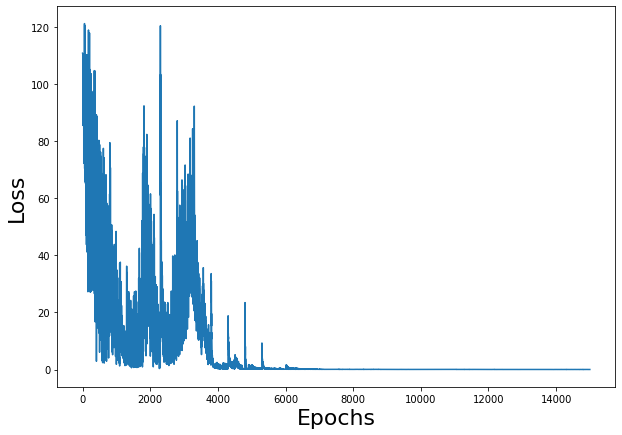

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(losses)
plt.xlabel("Epochs", fontsize=22)
plt.ylabel("Loss", fontsize=22)
plt.show()

In [22]:
max_games = 1000
wins = 0
for i in range(max_games):
    win = test_model(model_DQN, mode=game_mode, display=False, obstacles=obstacles_replay)
    if win:
        wins += 1
win_perc = float(wins) / float(max_games)
print("Games played: {0}, # of wins: {1}".format(max_games, wins))
print("Win percentage: {}%".format(100.0 * win_perc))

Games played: 1000, # of wins: 1000
Win percentage: 100.0%


In [23]:
test_model(model_DQN, mode='static', obstacles=obstacles_replay)

Initial State:
[['🙂' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '😎' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
Move #: 0; Taking action: r
[['🙂' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '😎' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
Move #: 1; Taking action: r
[['🙂' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '😎']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
Move #: 2; Taking action: d
[['🙂' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '😎']
 ['()' '()' '()' '()' '🙂']]
Move #: 3; Taking action: d
[['🙂' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '()']
 ['()' '()' '()' '()' '🙂']]
Game won! Reward: 50


True

In [24]:
print(f"Initial Q-Table")
print_q_table(model_init)

Initial Q-Table
State/Action	    ➡     	    ⬅     	    ⬆     	    ⬇     	
  (0, 0)  : 	  -0.095  	  -0.061  	  0.147   	  0.059   	
  (0, 1)  : 	  -0.096  	  -0.059  	  0.147   	  0.059   	
  (0, 2)  : 	  -0.096  	  -0.069  	  0.157   	  0.056   	
  (0, 3)  : 	  -0.095  	  -0.061  	  0.143   	  0.060   	
  (0, 4)  : 	  -0.097  	  -0.058  	  0.143   	  0.061   	
  (1, 0)  : 	  -0.097  	  -0.070  	  0.157   	  0.057   	
  (1, 1)  : 	  -0.096  	  -0.059  	  0.147   	  0.059   	
  (1, 2)  : 	  -0.095  	  -0.068  	  0.144   	  0.060   	
  (1, 3)  : 	  -0.096  	  -0.062  	  0.149   	  0.059   	
  (1, 4)  : 	  -0.095  	  -0.064  	  0.151   	  0.058   	
  (2, 0)  : 	  -0.096  	  -0.060  	  0.151   	  0.058   	
  (2, 1)  : 	  -0.096  	  -0.060  	  0.146   	  0.059   	
  (2, 2)  : 	  -0.095  	  -0.061  	  0.145   	  0.060   	
  (2, 3)  : 	  -0.095  	  -0.063  	  0.140   	  0.061   	
  (2, 4)  : 	  -0.096  	  -0.061  	  0.151   	  0.058   	
  (3, 0)  : 	  -0.095  	  -0.067  	  0.147   	  0.059   

In [25]:
print(f"Final Q-Table")
print_q_table(model_DQN)

Final Q-Table
State/Action	    ➡     	    ⬅     	    ⬆     	    ⬇     	
  (0, 0)  : 	  49.935  	  33.481  	  44.645  	  36.672  	
  (0, 1)  : 	  44.352  	  41.758  	  50.612  	  29.027  	
  (0, 2)  : 	  36.272  	  32.448  	  39.655  	  22.762  	
  (0, 3)  : 	  31.371  	  26.167  	  31.592  	  24.628  	
  (0, 4)  : 	 -13.433  	  22.729  	  14.307  	  18.668  	
  (1, 0)  : 	  49.920  	  29.577  	  40.941  	  38.852  	
  (1, 1)  : 	  39.804  	  31.639  	  40.043  	  26.728  	
  (1, 2)  : 	  31.295  	  25.783  	  31.745  	  22.070  	
  (1, 3)  : 	  13.626  	  22.490  	  23.397  	  22.522  	
  (1, 4)  : 	  11.257  	  30.402  	  29.852  	  23.702  	
  (2, 0)  : 	  40.069  	  27.332  	  35.936  	  29.413  	
  (2, 1)  : 	  31.503  	  22.985  	  28.948  	  24.676  	
  (2, 2)  : 	  23.529  	  19.433  	  23.293  	  22.733  	
  (2, 3)  : 	  20.982  	  19.387  	  22.962  	  30.844  	
  (2, 4)  : 	 -11.676  	  39.582  	  28.317  	  -1.480  	
  (3, 0)  : 	  31.263  	  23.401  	  29.252  	  24.324  	
